<a href="https://colab.research.google.com/github/LailaBulh/Programacion---Claas-Files/blob/main/Tarea_SVM_Clases_No_Balanceadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Tarea: Clasificación con SVM en un contexto de Clases No Balanceadas

**Nivel:** Maestría  
**Duración estimada:** 2-3 horas  
**Herramientas:** Python, Scikit-Learn, imbalanced-learn, Matplotlib, Google Colab  
**Temas clave:**  
- Clasificación con SVM  
- Clases no balanceadas  
- Validación cruzada estratificada  
- Métricas adaptadas a desbalance  
- SMOTE y otras técnicas de remuestreo


## 🧾 Objetivos de aprendizaje

Al finalizar esta tarea, el estudiante será capaz de:

- Identificar los efectos del desbalance de clases en modelos clasificadores.
- Implementar una SVM en un escenario multiclase o binario con fuerte desbalance.
- Evaluar el rendimiento del modelo usando métricas robustas como recall, F1, y G-mean.
- Aplicar técnicas como SMOTE y comparar su impacto.
- Utilizar `StratifiedKFold` para asegurar la adecuada evaluación del modelo.


## 1. **Carga y exploración del dataset**




In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix


In [2]:
### Carga de dataset
dataset = load_breast_cancer()

#dataset

In [3]:
### Distribucion de clases

X, y = dataset.data, dataset.target

unique, counts = np.unique(y, return_counts= True)
distribucion = dict(zip(dataset.target_names, counts))

print(f'La distribución de cada clase es: {distribucion}')


La distribución de cada clase es: {np.str_('malignant'): np.int64(212), np.str_('benign'): np.int64(357)}


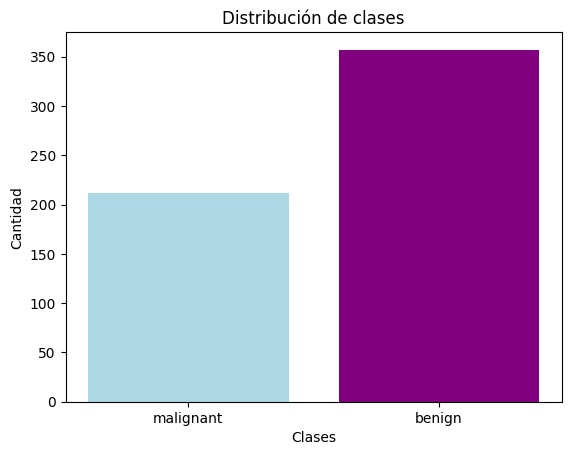

In [4]:
### Visualizacion de clases
colors = ['lightblue', 'purple']

fig, ax = plt.subplots()
ax.bar(distribucion.keys(), distribucion.values(), color = colors)
ax.set_xlabel('Clases')
ax.set_ylabel('Cantidad')
ax.set_title('Distribución de clases')
#ax.legend('Clases')
plt.show()



## 2. **Entrenamiento base con SVM**
   - Usa un modelo SVM con kernel RBF.
   - Aplica `StratifiedKFold` con 5 particiones.
   - Evalúa con métricas por clase: precisión, recall, F1-score.
   - Calcula y reporta métricas promedio y por clase.


In [18]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import precision_recall_fscore_support, classification_report

#from sklearn.datasets import make_circles


In [ ]:
### Modelo SVM con kernel RBF

gammas = [.5, 1, 2, 10]
for gamma in gammas:
    SVC_Gaussian = SVC(kernel='rbf', gamma='gamma')
    SVC_Gaussian.fit(X, y)
    #plot_decision_boundary(SVC_Gaussian, X, y)
    print(f'Accuracy con Gamma = {gamma} es:', SVC_Gaussian.score(X, y))

Accuracy con Gamma = 0.5 es: 1.0
Accuracy con Gamma = 1 es: 1.0
Accuracy con Gamma = 2 es: 1.0
Accuracy con Gamma = 10 es: 1.0


In [42]:
### Modelo SVM con kernel RBF
SVC_Gaussian = SVC(kernel='rbf', gamma= 'scale', C=1)

### Aplicar StratifiedkFold con 5 particiones
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### listas para acumular métricas
precisions, recalls, f1s = [], [], []

### Validación cruzada
for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

### Entrenamiento
    SVC_Gaussian.fit(X_train, y_train)
    y_pred = SVC_Gaussian.predict(X_test)

### Metricas por clase
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, labels=[0,1])
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)

### Resultado por clase
    print(classification_report(y_test, y_pred, target_names=dataset.target_names))



              precision    recall  f1-score   support

   malignant       0.95      0.88      0.92        43
      benign       0.93      0.97      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

              precision    recall  f1-score   support

   malignant       0.94      0.72      0.82        43
      benign       0.85      0.97      0.91        71

    accuracy                           0.88       114
   macro avg       0.90      0.85      0.86       114
weighted avg       0.88      0.88      0.87       114

              precision    recall  f1-score   support

   malignant       1.00      0.71      0.83        42
      benign       0.86      1.00      0.92        72

    accuracy                           0.89       114
   macro avg       0.93      0.86      0.88       114
weighted avg       0.91      0.89      0.89       114

              preci

In [43]:
### Metricas pormedio por clase

precision_avg = np.mean(precisions, axis= 0)
recall_avg = np.mean(recalls, axis= 0)
f1_avg = np.mean(f1s, axis= 0)


### Metricas promedio
print('Metricas promedio')
print(f'Precision= {precision_avg.mean():.3f}, Recall={recall_avg.mean():.3f}, F1={f1_avg.mean():.3f}')

### Metricas promedio por clase
print('\nMetricas promedio por clase')
for i, cls in enumerate(dataset.target_names):
    print(f"{cls}: Precision={precision_avg[i]:.3f}, Recall={recall_avg[i]:.3f}, F1={f1_avg[i]:.3f}")

Metricas promedio
Precision= 0.929, Recall=0.891, F1=0.904

Metricas promedio por clase
malignant: Precision=0.963, Recall=0.802, F1=0.872
benign: Precision=0.895, Recall=0.980, F1=0.935


## 3. **Análisis del problema de desbalance**


   - Interpreta las métricas: ¿qué clase tiene peor desempeño? ¿por qué?





   - Reporta matriz de confusión promedio.


In [44]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

Modelo sin tratamiento de desbalance:
              precision    recall  f1-score   support

           0      1.000     0.786     0.880        42
           1      0.887     1.000     0.940        71

    accuracy                          0.920       113
   macro avg      0.944     0.893     0.910       113
weighted avg      0.929     0.920     0.918       113



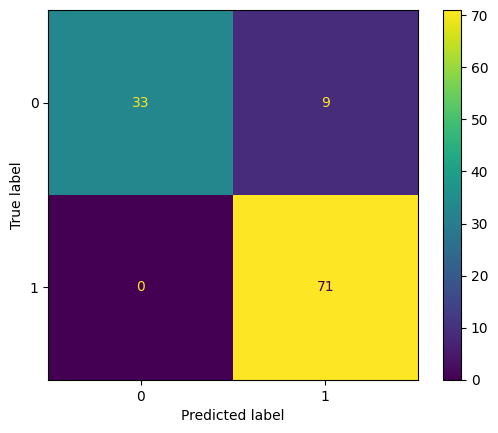

In [45]:
print("Modelo sin tratamiento de desbalance:")
print(classification_report(y_test, y_pred, digits=3))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

## 4. **Aplicación de SMOTE**
   - Aplica `SMOTE` solo al conjunto de entrenamiento dentro de cada fold.
   - Entrena nuevamente la SVM.
   - Compara métricas antes y después.



## 5. **Visualización y conclusiones**
   - Usa un gráfico de barras comparando F1 por clase antes y después.
   - Comenta las ventajas y riesgos de aplicar SMOTE con SVM.
   - Explica cuándo conviene usar otras técnicas como `One-Sided Selection` o `ADASYN`.

## 📁 Entregables

- Google Colab Notebook con:
  - Código bien comentado
  - Gráficas solicitadas
  - Conclusiones reflexivas al final
- Exportación del notebook a PDF
